In [2]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

<IPython.core.display.Javascript object>

In [9]:
df = pd.read_csv(
    "data/fake_data.csv",
    header=None,
    names=["name", "email", "country", "gender", "avg_rating", "long_tailed", "target"],
)

<IPython.core.display.Javascript object>

# Central Limit Theorem

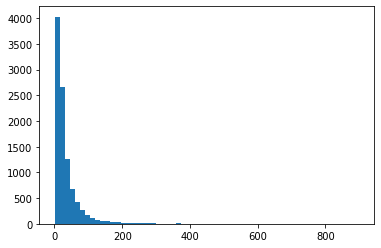

<IPython.core.display.Javascript object>

In [10]:
x = df["long_tailed"].value_counts().index
y = df["long_tailed"].value_counts().values
_ = plt.hist(df["long_tailed"], bins=60)

In [11]:
def get_sample_from_distribution(n, column="long_tailed"):
    """
    Get one sample.
    """
    s = df[column].sample(n=n, replace=True)
    return s

<IPython.core.display.Javascript object>

In [12]:
def get_n_samples_from_distribution(samples_number, sample_size):
    """
    Get multiple samples.
    """

    total = [sample_size] * samples_number
    samples = list(map(get_sample_from_distribution, total))
    return samples


def get_n_sample_means_from_distribution(samples_number, sample_size):
    samples = get_n_samples_from_distribution(
        samples_number=samples_number, sample_size=100
    )

    return list(map(np.mean, samples))


sample_means = get_n_sample_means_from_distribution(5, 100)
print(sample_means)

[30.91793864719119, 40.43089558849827, 45.22106783082975, 35.66920647909957, 33.3177581900762]


<IPython.core.display.Javascript object>

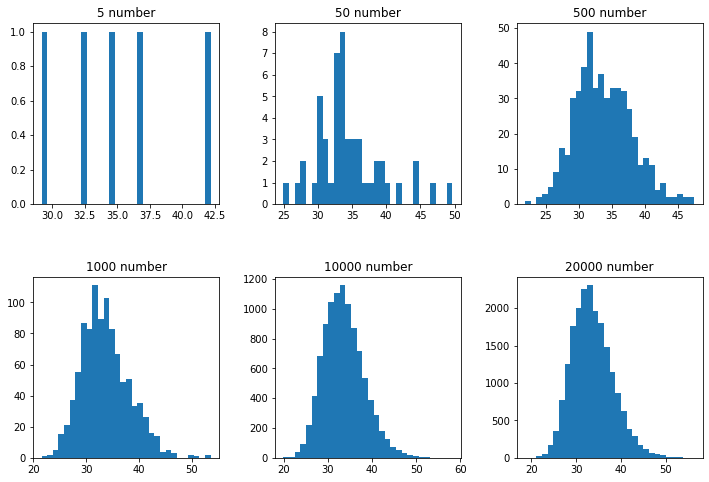

<IPython.core.display.Javascript object>

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.ravel()
number = [5, 50, 500, 1000, 10000, 20000]
for i in range(len(number)):
    sample_means = get_n_sample_means_from_distribution(
        samples_number=number[i], sample_size=100
    )
    axes[i].hist(sample_means, bins=30)
    axes[i].set_title("{0} number".format(number[i]))